In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\Sadiq\Documents\SiviSoft\Code\NLP_script\netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data['description'].iloc[1]

'After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.'

In [4]:
data['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [5]:
data['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [6]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [8]:
data = data.drop(['show_id','date_added','cast','director','country','release_year','duration'],1)
data.head()

C:\Users\Sadiq\AppData\Local\Temp/ipykernel_14240/1299883723.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(['show_id','date_added','cast','director','country','release_year','duration'],1)


,type,title,rating,listed_in,description
0,Movie,Dick Johnson Is Dead,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
data['AllTogether'] = data['title'].str.cat(data[['listed_in', 'description']], sep=' - ')
data.head()

,type,title,rating,listed_in,description,AllTogether
0,Movie,Dick Johnson Is Dead,PG-13,Documentaries,"As her father nears the end of his life, filmm...",Dick Johnson Is Dead - Documentaries - As her ...
1,TV Show,Blood & Water,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","Blood & Water - International TV Shows, TV Dra..."
2,TV Show,Ganglands,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"Ganglands - Crime TV Shows, International TV S..."
3,TV Show,Jailbirds New Orleans,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","Jailbirds New Orleans - Docuseries, Reality TV..."
4,TV Show,Kota Factory,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"Kota Factory - International TV Shows, Romanti..."


In [15]:
index_names = data[ (data['rating'] == '74 min') & (data['rating'] == '84 min') & (data['rating'] == '66 min')].index
  
# drop these given row
# indexes from dataFrame
data.drop(index_names, inplace = True)

In [16]:
data['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
84 min         1
66 min         1
Name: rating, dtype: int64

In [18]:
index_names = data[(data['rating'] == '66 min')].index
data.drop(index_names, inplace = True)

In [19]:
data['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
84 min         1
Name: rating, dtype: int64

In [20]:
index_names = data[(data['rating'] == '84 min')].index
data.drop(index_names, inplace = True)
data['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [21]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [22]:
final_df = data[['rating','AllTogether']]

In [24]:
import nltk
import re
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [25]:
final_df['clean_text'] = final_df['AllTogether'].apply(lambda x: clean_text(x))
final_df.head()

C:\Users\Sadiq\AppData\Local\Temp/ipykernel_14240/2912778873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['clean_text'] = final_df['AllTogether'].apply(lambda x: clean_text(x))


,rating,AllTogether,clean_text
0,PG-13,"Dick Johnson Is Dead - Documentaries - As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.",dick johnson is dead documentaries as her father nears the end of his life filmmaker kirsten johnson stages his death in inventive and comical ways to help them both face the inevitable
1,TV-MA,"Blood & Water - International TV Shows, TV Dramas, TV Mysteries - After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.",blood water international tv shows tv dramas tv mysteries after crossing paths at a party a cape town teen sets out to prove whether a private school swimming star is her sister who was abducted at birth
2,TV-MA,"Ganglands - Crime TV Shows, International TV Shows, TV Action & Adventure - To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.",ganglands crime tv shows international tv shows tv action adventure to protect his family from a powerful drug lord skilled thief mehdi and his expert team of robbers are pulled into a violent and deadly turf war
3,TV-MA,"Jailbirds New Orleans - Docuseries, Reality TV - Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series.",jailbirds new orleans docuseries reality tv feuds flirtations and toilet talk go down among the incarcerated women at the orleans justice center in new orleans on this gritty reality series
4,TV-MA,"Kota Factory - International TV Shows, Romantic TV Shows, TV Comedies - In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.",kota factory international tv shows romantic tv shows tv comedies in a city of coaching centers known to train india s finest collegiate minds an earnest but unexceptional student and his friends navigate campus life


In [ ]:
# The function below will visualize the words and their frequency in a set of documents. 
#Let’s use it to find out the most frequent words in the movie plots column:

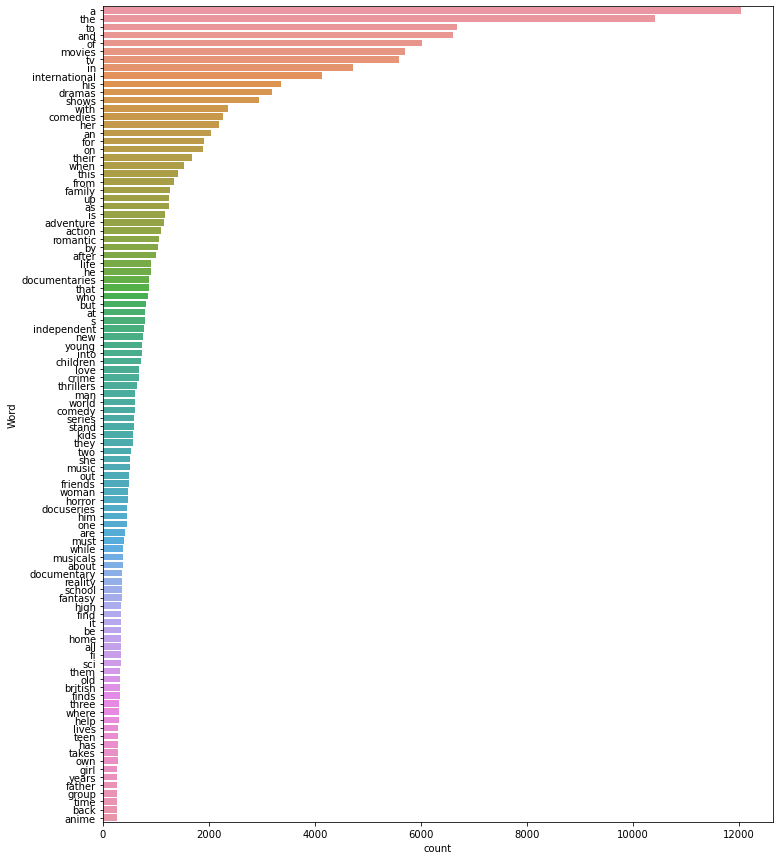

In [26]:
def freq_words(x, terms = 30): 
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
    d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()
  
# print 100 most frequent words 
freq_words(final_df['clean_text'], 100)

In [27]:
# Most of the terms in the above plot are stopwords. 
#These stopwords carry far less meaning than other keywords in the text (they just add noise to the data). 
#I’m going to go ahead and remove them from the plots’ text. 
#You can download the list of stopwords from the nltk library:

In [28]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

final_df['clean_text'] = final_df['clean_text'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sadiq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Sadiq\AppData\Local\Temp/ipykernel_14240/2029979065.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['clean_text'] = final_df['clean_text'].apply(lambda x: remove_stopwords(x))


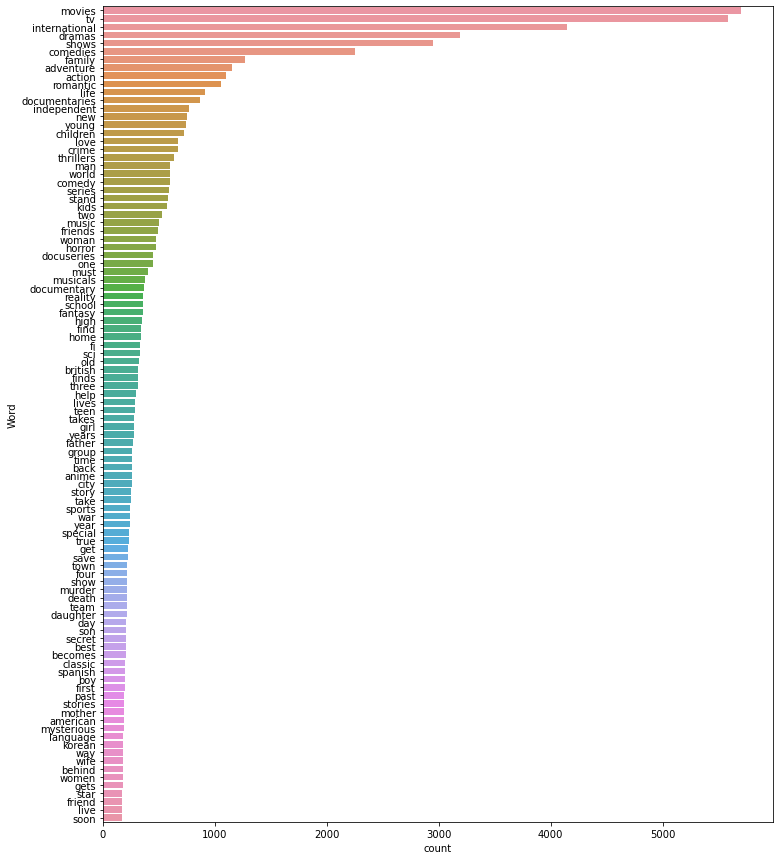

In [29]:
freq_words(final_df['clean_text'], 100)

### Converting Text to Features
Now I will treat this multi-label classification problem as a Binary Relevance problem. Hence, I will now one hot encode the target variable, i.e.,"rating" by using sklearn’s MultiLabelBinarizer( ). Since there are 14 unique rating tags, there are going to be 14 new target variables.

In [30]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(final_df['rating'])

# transform target variable
y = multilabel_binarizer.transform(final_df['rating'])

TypeError: 'float' object is not iterable

In [31]:
final_df.dtypes

rating         object
AllTogether    object
clean_text     object
dtype: object

In [37]:
final_df['rating'].mode()[0]

'TV-MA'

In [38]:
final_df['rating'] = final_df['rating'].fillna(final_df['rating'].mode()[0])

C:\Users\Sadiq\AppData\Local\Temp/ipykernel_14240/3570156882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['rating'] = final_df['rating'].fillna(final_df['rating'].mode()[0])


In [39]:
final_df.isnull().sum()

rating         0
AllTogether    0
clean_text     0
dtype: int64

In [40]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(final_df['rating'])

# transform target variable
y = multilabel_binarizer.transform(final_df['rating'])

In [41]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [42]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(final_df['clean_text'], y, test_size=0.2, random_state=92)

In [43]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

# Building ML models

In [44]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [45]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [46]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [47]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [49]:
y_pred[1]

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [51]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.7155332856120258

In [53]:
# Instantiate calssifier
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=42,class_weight='balanced')

In [54]:
clf_rf = OneVsRestClassifier(rf)
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.7155332856120258

In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [3, 6, 8],'max_features': ['auto', 'sqrt','log2'],'min_samples_leaf': [4,6,8],'n_estimators': [100,150]}
rf_sample = RandomForestClassifier(random_state=42,class_weight='balanced')
grid_search = GridSearchCV(rf_sample,param_grid =param_grid,cv=3,scoring='r2')

In [56]:
clf_rf_cv = OneVsRestClassifier(grid_search)
# fit model on train data
clf_rf_cv.fit(xtrain_tfidf, ytrain)
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)
# evaluate performance
f1_score(yval, y_pred, average="micro")

C:\Users\Sadiq\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Sadiq\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


0.7155332856120258

In [58]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.7343469965890039